### Part 1: Using Kaggle API To Download Dataset

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import random
import zipfile
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [82]:
def load_sampled_data():
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_file('wilmerarltstrmberg/recipe-dataset-over-2m', file_name='recipes_data.csv')
    
    with zipfile.ZipFile('recipes_data.csv.zip', 'r') as zipref:
        zipref.extractall()
    
    df = pd.read_csv("recipes_data.csv")
    random.seed(1234)
    df = df.sample(frac=0.05)
    
    return df

In [3]:
df = pd.read_csv("recipes_data.csv")
random.seed(1234)
df = df.sample(frac=0.05)

In [ ]:
df = load_sampled_data()

Above is a function that downloads the recipes data CSV from Kaggle using my Kaggle API. It then unzips the zipped dataset downloaded and extracts it. It is then read into a pandas dataframe and that dataframe only uses 5% of the full dataset (selected at random) to do analysis on. The reason being was that the data set was far to large for me to properly fine tune the model the way I wanted to. 

### Part 2: Exploritory Data

Next is the exploritory data section, where I do some exploritory analysis about the data to figure out what I need to change.

In [4]:
df.head()

,title,ingredients,directions,link,source,NER,site
2004839,Steam egg white pudding,"[""5 egg whites"", ""3 tbsp sugar"", ""5 cup whole ...","[""Prepare a steamer with hot water."", ""Heat th...",cookpad.com/us/recipes/368103-steam-egg-white-...,Recipes1M,"[""sugar"", ""milk"", ""egg whites""]",cookpad.com
971185,Danish Aebleskiver,"[""1 cup sour cream"", ""4 egg yolks"", ""1/4 teasp...","[""Heat aebleskiver pan until hot."", ""Put small...",www.food.com/recipe/danish-aebleskiver-122975,Gathered,"[""sweet milk"", ""sour cream"", ""baking powder"", ...",www.food.com
1841396,Detox Cleansing Green Berry Smoothie,"[""2 cup water"", ""1/2 cup fresh orange juice (o...","[""Add the water (and juice if your adding OJ) ...",cookpad.com/us/recipes/365001-detox-cleansing-...,Recipes1M,"[""ground flaxseed"", ""strawberry"", ""water"", ""or...",cookpad.com
2145154,Kelsey's Peanut Butter Bars,"[""12 cup peanut butter"", ""13 cup butter, softe...","[""Combine flour, baking powder and salt, set a...",www.food.com/recipe/kelseys-peanut-butter-bars...,Recipes1M,"[""sugar"", ""vanilla"", ""baking powder"", ""brown s...",www.food.com
1159029,Easy Salisbury Steak,"[""1 (10 ounce) can cream of mushroom soup"", ""1...","[""Combine soup and water. Add 1/4 cup soup mix...",www.food.com/recipe/easy-salisbury-steak-115454,Gathered,"[""egg"", ""cream of mushroom soup"", ""water"", ""br...",www.food.com


In [5]:
# dropping unneeded/not used rows 
df = df.drop(['source','link'], axis=1)

In [6]:
df.describe()

,title,ingredients,directions,NER,site
count,111557,111557,111557,111557,111557
unique,87163,111536,111370,108610,28
top,Broccoli Casserole,"[""4 c. flour"", ""1 c. salt"", ""1 1/2 c. water""]","[""Put ingredients into bread machine and press...",[],www.cookbooks.com
freq,208,2,15,24,44821


In [7]:
pd.set_option('display.max_colwidth', 1000)

In [8]:
df.head()

,title,ingredients,directions,NER,site
2004839,Steam egg white pudding,"[""5 egg whites"", ""3 tbsp sugar"", ""5 cup whole milk""]","[""Prepare a steamer with hot water."", ""Heat the milk in microwave for 4 minutes"", ""Take out the hot milk out if the microwave, than add sugar and mix well till disolve."", ""Can put more sugar if you want it sweeter."", ""Sepearte egg whites and egg yolks in different bowls."", ""Each bowl contain 1 egg white, remain of the egg yolks can be made as omelleteor scramble"", ""Pour the milk mixture in with the egg whites, stir until it is mixed."", ""Wrap tightly with cling film so no air goes in the bowl."", ""It prevent any bubbles forming on the skin."", ""Put the mixture in the steamer."", ""Steam for 12 minutes."", ""Every 3 minutes lift the lid up of the steamer to let the air out."", ""After 12 minutes you can take them out and enjoy it either hot or cold""]","[""sugar"", ""milk"", ""egg whites""]",cookpad.com
971185,Danish Aebleskiver,"[""1 cup sour cream"", ""4 egg yolks"", ""1/4 teaspoon nutmeg"", ""2 teaspoons baking powder"", ""3 cups flour"", ""2 cups sweet milk"", ""1 teaspoon salt"", ""3 tablespoons sugar"", ""1 teaspoon baking soda"", ""4 egg whites, stiffly-beaten""]","[""Heat aebleskiver pan until hot."", ""Put small amount of melted fat in each cup and add 2 tablespoons batter."", ""When batter starts to bubble and edges are browned, turn over with a fork and bake on other side."", ""Serve while hot, with jelly and sugar.""]","[""sweet milk"", ""sour cream"", ""baking powder"", ""sugar"", ""nutmeg"", ""baking soda"", ""egg whites"", ""flour"", ""egg yolks"", ""salt""]",www.food.com
1841396,Detox Cleansing Green Berry Smoothie,"[""2 cup water"", ""1/2 cup fresh orange juice (optional )"", ""2 1/2 bunch spinach(x2)"", ""2 small gala apples"", ""1 banana (optional )"", ""2 cup frozen mixed berries (strawberry,blackberry,raspberry,blueberry )"", ""2 tbsp ground flaxseed (and/or chia seeds)"", ""1 packages stevia (or more to taste)""]","[""Add the water (and juice if your adding OJ) and spinach into a blender."", ""Blend for 1 minute."", ""Add apples (and banana if your adding), mixed frozen berries, flaxseed (and/or chia seeds), and the stevia."", ""Blend for 1-2min until well blended."", ""**if you like your smoothies less chunky, add another cupof water and blend an extra minute."", ""Substitute options: you can easily substitute spinach for mixed greens or kale if you dont have any on hand."", ""And berries can be any other frozen fruit (peaches, pineapple, papaya, grapes, etc)""]","[""ground flaxseed"", ""strawberry"", ""water"", ""orange juice"", ""stevia"", ""banana"", ""gala apples""]",cookpad.com
2145154,Kelsey's Peanut Butter Bars,"[""12 cup peanut butter"", ""13 cup butter, softened"", ""34 cup sugar"", ""34 cup brown sugar"", ""3 eggs, beaten"", ""1 teaspoon vanilla"", ""2 cups flour"", ""2 teaspoons baking powder"", ""14 teaspoon salt"", ""12 cup peanut butter"", ""2 12 cups powdered sugar"", ""1 teaspoon vanilla"", ""13 cup milk""]","[""Combine flour, baking powder and salt, set aside."", ""Cream together peanut butter and butter."", ""Add sugar, brown sugar, eggs and vanilla."", ""Mix until well combined."", ""Stir in dry ingredients."", ""Pour into a greased 9x13 pan and bake at 350 degrees for approximately 25 minutes."", ""Remove from oven and allow to cool completely."", ""ICING:."", ""Combine all icing ingredients and mix until smooth."", ""Spread over cooled bars.""]","[""sugar"", ""vanilla"", ""baking powder"", ""brown sugar"", ""eggs"", ""peanut butter"", ""powdered sugar"", ""flour"", ""milk"", ""butter"", ""salt""]",www.food.com
1159029,Easy Salisbury Steak,"[""1 (10 ounce) can cream of mushroom soup"", ""1 cup water"", ""1 lb ground beef"", ""1/3 cup breadcrumbs"", ""2 tablespoons minced onions"", ""2 tablespoons minced parsley"", ""1 egg"", ""salt and pepper""]","[""Combine soup and water. Add 1/4 cup soup mixture with ground beef, bread crumbs, onion, pa

In [9]:
# find the unique attributes in the websites
unique_websites = df['site'].unique()
unique_websites

array(['cookpad.com', 'www.food.com', 'www.cookbooks.com', 'food52.com',
       'www.epicurious.com', 'www.tasteofhome.com', 'tastykitchen.com',
       'www.yummly.com', 'www.kraftrecipes.com', 'www.myrecipes.com',
       'recipeland.com', 'www.cookstr.com', 'www.allrecipes.com',
       'cookeatshare.com', 'www.foodnetwork.com', 'recipes-plus.com',
       'cooking.nytimes.com', 'www.vegetariantimes.com',
       'www.seriouseats.com', 'www.delish.com', 'www.chowhound.com',
       'www.foodandwine.com', 'allrecipes.com', 'online-cookbook.com',
       'www.lovefood.com', 'www.foodgeeks.com', 'www.landolakes.com',
       'www.foodrepublic.com'], dtype=object)

### Part 3: The WordCloud

There were about 25 unique websites in the data frame, I thought this data would be useful later

In [22]:
def generate_wordcloud(df):
    # Tokenize and preprocess each ingredient item
# Extract main ingredient from each item

    def extract_ingredient(item):
    # This is a simple extraction method and might need refinement
        return item.split()[-1]

    ingredients = df['ingredients'].explode().apply(extract_ingredient)

    # Create word cloud
    wordcloud = WordCloud(background_color='white').generate(' '.join(ingredients))

    # Display the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

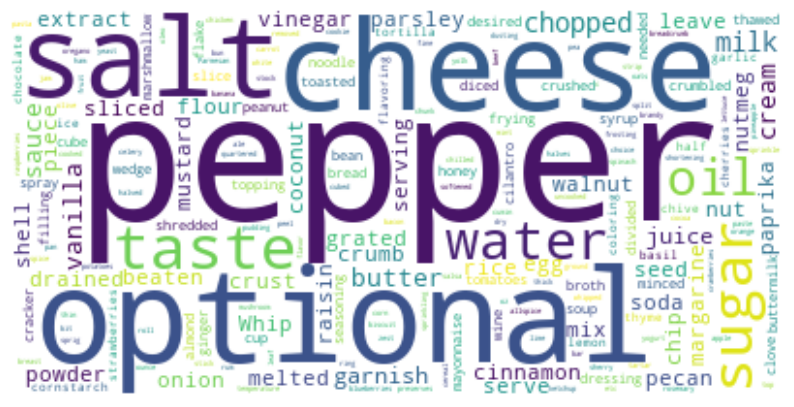

In [23]:
generate_wordcloud(df)

Above is a word cloud, where I tried to show the words that these recipes were using. I learned that most recipes include, pepper, salt, cheese, oil, and the word "optional", which I thought was pretty cool.

### Part 4: Predicting Which Website

In [24]:
df = df.dropna(subset=['NER'])

I thought it would be best to try and guess where each recipe came from and predict which website posted which recipe.

In [11]:
# Predicting which website the food came from

def predict_website(df):
    # Preprocess the ingredients
    df['NER'] = df['NER'].str.lower().str.replace('[^\w\s]', '')

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(df['NER'], df['site'], test_size=0.2, random_state=123)

    # Convert ingredients to vectors
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Train a Logistic Regression model
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_vec, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test_vec)

    # Evaluate the model
    print(classification_report(y_test, y_pred))

In [12]:
predict_website(df)

/Users/thepistachio/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thepistachio/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

         allrecipes.com       0.00      0.00      0.00        35
       cookeatshare.com       0.90      0.20      0.33       561
    cooking.nytimes.com       0.24      0.02      0.04       180
            cookpad.com       0.55      0.16      0.24       634
             food52.com       0.43      0.12      0.19       478
    online-cookbook.com       0.00      0.00      0.00        55
         recipeland.com       0.56      0.08      0.15       259
       recipes-plus.com       0.55      0.23      0.32       204
       tastykitchen.com       0.75      0.37      0.50       786
     www.allrecipes.com       0.44      0.15      0.22       621
      www.chowhound.com       0.00      0.00      0.00        53
      www.cookbooks.com       0.67      0.91      0.77      8900
        www.cookstr.com       0.00      0.00      0.00        91
         www.delish.com       0.00      0.00      0.00        34
     www.epicurious.com 

/Users/thepistachio/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Above is a prediction of which recipe came from which website. The model has varying performance across different websites. For instance, it does well for www.cookbooks.com with a high F1-score of 0.77, but poorly for several sites like allrecipes.com, online-cookbook.com, and www.cookstr.com with an F1-score of 0.00. The overall accuracy of the model is 0.57, which means it predicts the correct website for a recipe about 57% of the time. However, several websites have a precision of 0.00, indicating that the model never correctly predicts them, or when it does, it's often wrong.

### Part 5: Saving The New Data Frame

In [108]:
def save_dataframe_to_csv(df, file_name="output.csv"):
    df = df.astype(str)
    df.to_csv(file_name, index=False)
    print(f"Dataframe saved to {file_name}.")

In [115]:
save_dataframe_to_csv(df, 'recipe_shortest.csv')

Dataframe saved to recipe_shortest.csv.


Above is where the short data set is saved to the current folder, the reason the amount used was used is because I am using a file that requires the size of the dataset to be less than 200MB. The entire dataset is currently over 2.2GB